In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("dark")

In [2]:
train = pd.read_csv("../data/train_fe.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,cryosleep,vip,side,destination_55_cancri_e,destination_pso_j318_5_22,destination_trappist_1e,homeplanet_earth,homeplanet_europa,homeplanet_mars,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.215190,0.000000,0.043105,0.001320,0.000000,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.354430,0.000000,0.000000,0.000000,0.000000,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.253165,0.000000,0.000072,0.012302,0.052552,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.455696,0.000000,0.000000,0.000000,0.000000,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.468354,0.100806,0.000000,0.003405,0.002154,0.0,0.0


In [4]:
cols = ['age','roomservice', 'spa', 'vrdeck', 'homeplanet_earth', 'homeplanet_europa', 'homeplanet_mars', 'transported']

In [5]:
train = train[cols]

In [6]:
x_train_use, y_train_use = train.drop("transported", axis = 1), train["transported"]

In [7]:
#x_train_use = x_train_use.drop_duplicates().reset_index(drop=True)

In [8]:
train.shape

(6047, 8)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train_use, y_train_use, train_size=0.8, random_state = 42)

In [10]:
x_train.shape, y_train.shape

((4837, 7), (4837,))

### Support Vector Classifiers

In [11]:
svc = SVC(kernel="linear")
svc.fit(x_train, np.array(y_train).reshape(-1,1))

SVC(kernel='linear')

In [12]:
y_pred = svc.predict(x_train)

In [13]:
f1_score(y_train, y_pred)

0.6267444810961685

In [14]:
svc_pipeline = Pipeline([("svc", SVC(kernel = "poly"))])
param_grid = [{"svc__degree":np.arange(10)}]
grid_search = GridSearchCV(svc_pipeline, param_grid, cv = 5)

In [15]:
grid_search.fit(x_train, np.array(y_train).reshape(-1,1))

GridSearchCV(cv=5, estimator=Pipeline(steps=[('svc', SVC(kernel='poly'))]),
             param_grid=[{'svc__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}])

In [16]:
grid_search.best_params_

{'svc__degree': 6}

In [17]:
model = grid_search.best_estimator_

In [18]:
model.fit(x_train, y_train)

Pipeline(steps=[('svc', SVC(degree=6, kernel='poly'))])

In [19]:
y_pred = model.predict(x_train)

In [20]:
f1_score(y_train, y_pred)

0.8014318010550113

In [21]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76      2439
         1.0       0.73      0.89      0.80      2398

    accuracy                           0.78      4837
   macro avg       0.80      0.78      0.78      4837
weighted avg       0.80      0.78      0.78      4837



In [22]:
train["transported"].value_counts()

1.0    3032
0.0    3015
Name: transported, dtype: int64

In [23]:
import seaborn as sns; sns.set_style("darkgrid")

<AxesSubplot:>

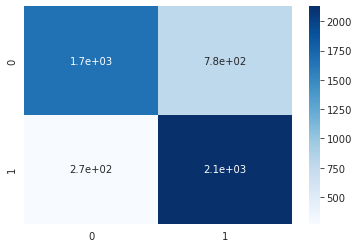

In [24]:
conf = confusion_matrix(y_train, y_pred)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [25]:
y_pred_val = model.predict(x_val)

In [26]:
f1_score(y_val, y_pred_val)

0.8123620309050772

In [27]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.83      0.70      0.76       576
         1.0       0.76      0.87      0.81       634

    accuracy                           0.79      1210
   macro avg       0.80      0.79      0.79      1210
weighted avg       0.79      0.79      0.79      1210



#### Extracting results

In [28]:
import time
start = time.time()
model.fit(x_train_use, y_train_use)
elapsed = time.time() - start

In [29]:
pred_use = model.predict(x_train_use)

In [30]:
cross_val_score(model, x_train_use, y_train_use, scoring="f1")

array([0.79280576, 0.80991736, 0.79348631, 0.78603269, 0.81425322])

In [31]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.86      0.65      0.74      3015
         1.0       0.72      0.89      0.80      3032

    accuracy                           0.77      6047
   macro avg       0.79      0.77      0.77      6047
weighted avg       0.79      0.77      0.77      6047



In [32]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [33]:
test = test[cols]

In [34]:
test

,age,roomservice,spa,vrdeck,homeplanet_earth,homeplanet_europa,homeplanet_mars,transported
0,0.240506,0.042036,0.000162,0.043799,0.0,0.0,1.0,1.0
1,0.227848,0.000403,0.000000,0.000041,1.0,0.0,0.0,0.0
2,0.518987,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
3,0.443038,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
4,0.544304,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1520,0.202532,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0
1521,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
1522,0.215190,0.002117,0.014000,0.000207,1.0,0.0,0.0,0.0
1523,0.531646,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0


In [35]:
x_test, y_test = test.drop("transported", axis =1), test["transported"]

In [36]:
pred_test = model.predict(x_test)

In [37]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.64      0.73       745
         1.0       0.72      0.89      0.80       780

    accuracy                           0.77      1525
   macro avg       0.78      0.76      0.76      1525
weighted avg       0.78      0.77      0.76      1525



In [38]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [39]:
conf = confusion_matrix(y_test, pred_test)

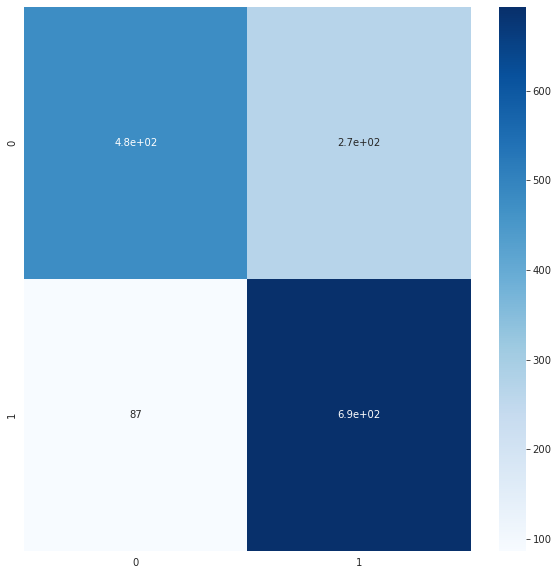

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(conf, annot=True, cmap="Blues")
#plt.show();
plt.savefig("../conf/svc.png")

In [41]:
df = pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "SVC"
df["elapsed"] = elapsed

In [42]:
df

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.796094,0.798291,0.721438,0.721124,0.89347,0.888462,SVC,2.179139


In [43]:
df.to_csv("../results/regular/svc.csv", index=False)